In [1]:
# dependencies libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

**Import train dataset**

In [2]:
train_df = pd.read_csv(r'titanic.csv')

**Data Wraggling**

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_df.size

10692

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.columns  = train_df.columns.str.lower()

**Data Cleaning**

In [10]:
train_df.duplicated().sum()

0

In [11]:
# this way also helps to find the categorical data in columns
train_df.loc[:, ["survived", "pclass", "embarked"]].nunique()

survived    2
pclass      3
embarked    3
dtype: int64

In [12]:
# missing values
train_df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [13]:
# train_df has 68% data of the total. 
# age column has 13.51% null data compared to total and 19.865% null data compared to train_df.
# cabin column has 52.44% null data compared to total and 77.10% null data compared to train_df.
def nullPercent(data_obj, dropping_column_list):
    for x in range(len(data_obj.columns)):
        total_null = data_obj.iloc[:,x].isnull().sum()
        null_percent = total_null /  data_obj.shape[0] *100
        if null_percent >= 20:
            dropping_column_list.append(data_obj.iloc[:, x])
            print("Dropped Column {column} has {percent:.2f}% null percent.".format(column=data_obj.columns[x], percent=null_percent))
    transform_column = pd.DataFrame(data=dropping_column_list).T
    df = data_obj.drop(columns= transform_column)        
    return df

In [14]:
# new dataframe has created as "df"
dropping_column_list = []
df = nullPercent(train_df, dropping_column_list)
df.head(1)

Dropped Column cabin has 77.10% null percent.


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [15]:
df.shape

(891, 11)

In [16]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [17]:
df  = df.drop(columns=["passengerid", "name", "sibsp", "parch", "ticket", "fare"])

In [18]:
print(df.shape,'\n', df.columns)

(891, 5) 
 Index(['survived', 'pclass', 'sex', 'age', 'embarked'], dtype='object')


In [19]:
# fill age data with mean value of the column
df["age"].fillna(value=df["age"].mean(), inplace=True)

C:\Users\SUMMIT\AppData\Local\Temp\ipykernel_16760\4259356851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(value=df["age"].mean(), inplace=True)


****

In [20]:
# fill categorical value with highest mode of  the column
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

C:\Users\SUMMIT\AppData\Local\Temp\ipykernel_16760\2571126204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)


**Exploratory Data Analysis**

<Axes: xlabel='survived', ylabel='count'>

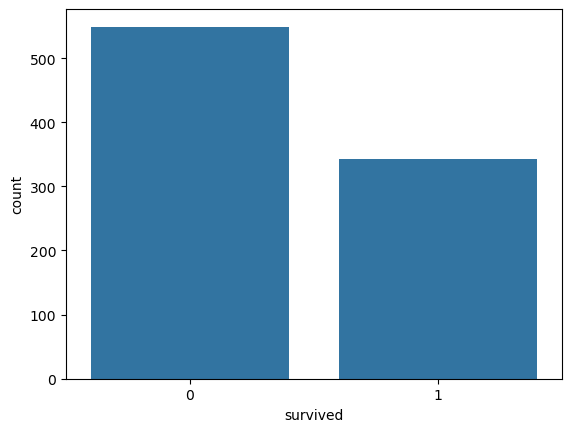

In [21]:
# Survival count plot 0="Not Survived" 1="Survived"
sns.countplot(data=df, x="survived")

<Axes: xlabel='pclass', ylabel='count'>

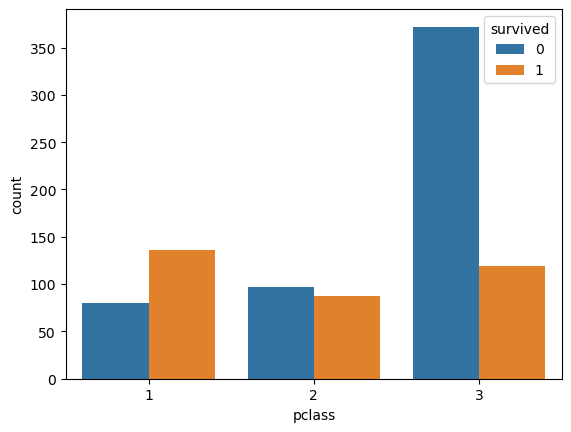

In [22]:
# ticket class with-respect-to survival count
sns.countplot(data=df, x="pclass", hue="survived")

<Axes: xlabel='sex', ylabel='count'>

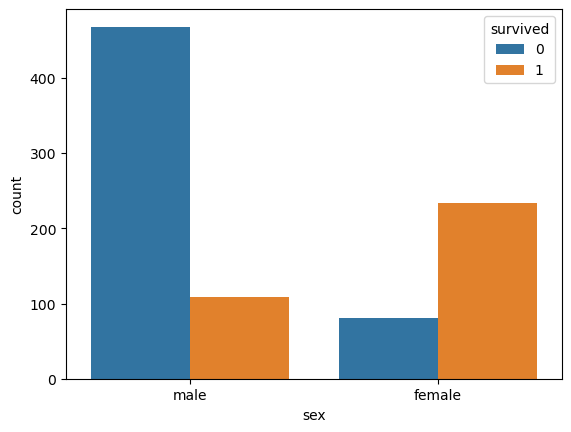

In [23]:
sns.countplot(data=df, x="sex", hue="survived")

<Axes: xlabel='survived', ylabel='age'>

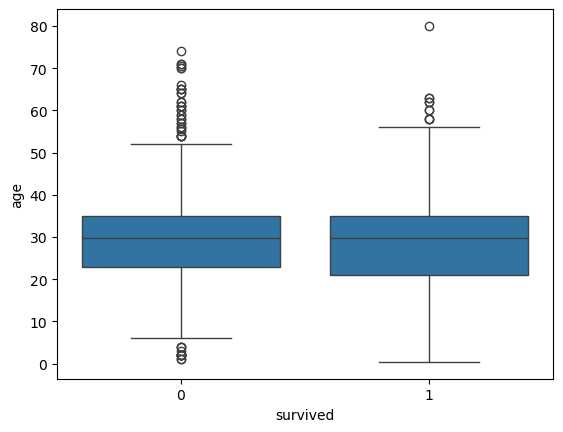

In [24]:
# death of children < 8 and > 50 are outliers to the "not servived" category, most death were between
# 8 to 50 and most srvived were described 2 to 58, above survived above it were rare.
sns.boxplot(data=df, x="survived", y="age")

<Axes: xlabel='embarked', ylabel='count'>

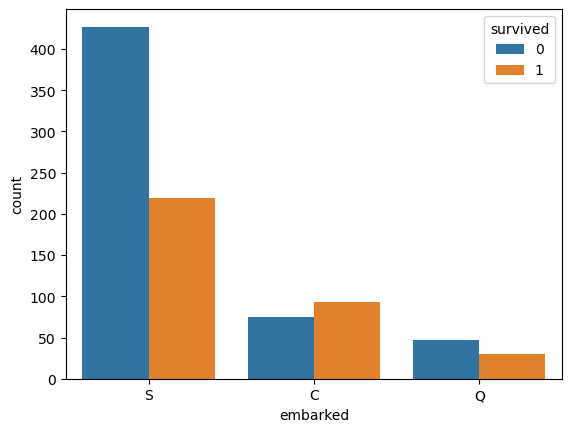

In [25]:
sns.countplot(data=df, x="embarked", hue="survived")

In [26]:
# count of survived male and female
df.groupby(by="sex")["survived"].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [27]:
# count of survived group by emabrked
df.groupby(by="embarked")["survived"].count()

embarked
C    168
Q     77
S    646
Name: survived, dtype: int64

convert sex column data male:0, female:1 and embarked column data C:0, Q:1, S:2

In [28]:
df.replace({
    "sex":{"male":0, "female":1},
    "embarked":{"C":0, "Q":1, "S":2}
}, inplace=True)

C:\Users\SUMMIT\AppData\Local\Temp\ipykernel_16760\1255973183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [29]:
df.head()

,survived,pclass,sex,age,embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2


**Dependent variable Y and independent variable X**

In [30]:
X = df.drop(columns="survived", axis=1)
Y= df["survived"]

In [31]:
X.head()

,pclass,sex,age,embarked
0,3,0,22.0,2
1,1,1,38.0,0
2,3,1,26.0,2
3,1,1,35.0,2
4,3,0,35.0,2


In [32]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

**Splitting data into train_test_split**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=40)

In [34]:
print(X_train.shape,Y_train.shape, X_test.shape, Y_test.shape)

(712, 4) (712,) (179, 4) (179,)


In [46]:
print(X_train.columns, X_test.columns)

Index(['pclass', 'sex', 'age', 'embarked'], dtype='object') Index(['pclass', 'sex', 'age', 'embarked'], dtype='object')


**Find the model for the prediction using Logistic regression**

In [35]:
logReg = LogisticRegression()

In [36]:
logReg.fit(X_train, Y_train)

LogisticRegression()

**Predict the X_train data which has already read the Y_train**

In [37]:
X_train_Predicted = logReg.predict(X_train)

In [38]:
print(X_train_Predicted)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 

**Find the accuracy score for training data X_train**

In [39]:
X_train_accuracy = accuracy_score(Y_train, X_train_Predicted)
print("Accuracy Score Of Training Data::",X_train_accuracy)

Accuracy Score Of Training Data:: 0.7893258426966292


**Predict the X_test data**

In [40]:
X_test_Predicted  = logReg.predict(X_test)
print(X_test_Predicted)

[1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1]


In [41]:
print(Y_test)

246    0
588    0
472    1
71     0
654    0
      ..
284    0
727    1
599    1
525    0
457    1
Name: survived, Length: 179, dtype: int64


In [47]:
df.loc[246]

survived     0.0
pclass       3.0
sex          1.0
age         25.0
embarked     2.0
Name: 246, dtype: float64

**Accuracy Score for testing data**

In [42]:
X_test_accuracy = accuracy_score(Y_test, X_test_Predicted)
print("Accuracy Score Of Testing Data::", X_test_accuracy)

Accuracy Score Of Testing Data:: 0.7988826815642458


### Confusion matrix

In [43]:
pd.DataFrame(confusion_matrix(Y_test, X_test_Predicted))

,0,1
0,86,17
1,19,57


### save the model

In [44]:
import pickle

In [45]:
with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(logReg, f)